In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point, Polygon
import itertools

In [11]:
vale = gpd.read_file('raw_data/shapefiles/setoresCensitarios_VR.shp')

In [12]:
vale

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,...,PERC_LSOA2,DECILE_LS2,PERC_LSOA3,DECILE_LS3,PERC_LSOA4,DECILE_LS4,RENDA0,RENDA1,RENDA2,geometry
0,66717.0,350270505000001,URBANO,35027050500,None,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,...,0.0,2.0,0.0,8.0,0.0,10.0,1.832506,-1.175954,1.681945,"POLYGON ((-48.84713 -24.51469, -48.84753 -24.5..."
1,66718.0,350270505000002,URBANO,35027050500,None,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,...,0.0,3.0,0.0,10.0,0.0,10.0,1.845521,-2.134206,-0.721357,"POLYGON ((-48.84580 -24.51313, -48.84650 -24.5..."
2,66719.0,350270505000003,URBANO,35027050500,None,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,...,0.0,1.0,0.0,6.0,0.0,9.0,3.473261,-4.054620,3.781584,"POLYGON ((-48.84489 -24.51740, -48.84509 -24.5..."
3,66720.0,350270505000004,URBANO,35027050500,None,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,...,0.0,1.0,0.0,5.0,0.0,6.0,1.550119,-1.459676,-0.621910,"POLYGON ((-48.85038 -24.52333, -48.85048 -24.5..."
4,66721.0,350270505000005,URBANO,35027050500,None,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,...,0.0,4.0,0.0,4.0,0.0,7.0,1.332302,1.510061,1.994217,"POLYGON ((-48.84228 -24.52494, -48.84244 -24.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,21414.0,412863305000009,RURAL,41286330500,None,412863305,DOUTOR ULYSSES,4128633,DOUTOR ULYSSES,CERRO AZUL,...,0.0,4.0,0.0,8.0,0.0,10.0,-1.958569,4.057675,0.292695,"POLYGON ((-49.39916 -24.70718, -49.35284 -24.6..."
950,21415.0,412863305000010,RURAL,41286330500,None,412863305,DOUTOR ULYSSES,4128633,DOUTOR ULYSSES,CERRO AZUL,...,0.0,3.0,25.0,7.0,0.0,10.0,-1.395877,3.018495,1.400684,"POLYGON ((-49.37073 -24.61246, -49.36844 -24.6..."
951,21416.0,412863305000011,RURAL,41286330500,None,412863305,DOUTOR ULYSSES,4128633,DOUTOR ULYSSES,CERRO AZUL,...,0.0,3.0,0.0,6.0,0.0,10.0,-2.080340,0.501958,-0.187184,"POLYGON ((-49.46065 -24.62345, -49.46026 -24.6..."
952,21417.0,412863305000012,RURAL,41286330500,None,412863305,DOUTOR ULYSSES,4128633,DOUTOR ULYSSES,CERRO AZUL,...,0.0,1.0,0.0,6.0,0.0,10.0,-1.967962,0.914923,-0.184844,"POLYGON ((-49.53348 -24.68126, -49.53345 -24.6..."


Text(0.5, 1, 'Adrianópolis')

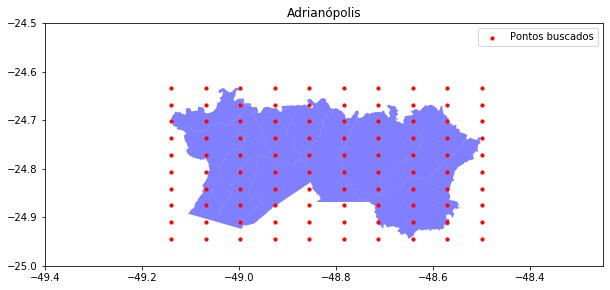

In [15]:
fig, axs = plt.subplots(1, 1, figsize=(10,10))
# brasil.plot(ax=axs)
# geo[geo['city']=='Adrianópolis'].plot(ax=axs, markersize=1, color='k')
reg = vale[vale['NM_DISTRIT'] == 'ADRIANÓPOLIS']
reg.plot(ax=axs, color='blue', alpha=0.5, label='Área da região')
bounds = reg.total_bounds
rangex = np.linspace(bounds[0], bounds[2], 10)
rangey = np.linspace(bounds[1], bounds[3], 10)
plt.scatter(*np.array(list(itertools.product(rangex, rangey))).T, c='red', s=10,
           label='Pontos buscados')
# plt.xlim(-55,-45)
# plt.ylim(-27.5, -22.5)
plt.xlim(-49.4,-48.25)
plt.ylim(-25, -24.5)
plt.legend()
plt.title('Adrianópolis')

In [16]:
city_codes = {
    'PARIQUERA-AÇU': 3536208,
    'RIBEIRA': 3542800,
    'ITAOCA': 3522158,
    'CANANÉIA': 3509908,
    'ELDORADO': 3514809,
    'IGUAPE': 3520301,
    'ILHA COMPRIDA': 3520426,
    'JACUPIRANGA': 3524600,
    'IPORANGA': 3521200,
    'JUQUIÁ': 3526100,
    'ITARIRI': 3523305,
    'JUQUITIBA': 3526209,
    'ITAPIRAPUÃ PAULISTA': 3522653,
    'MIRACATU': 3529906,
    'TAPIRAÍ': 3553500,
    'SÃO LOURENÇO DA SERRA': 3549953,
    'REGISTRO': 3542602,
    'SETE BARRAS': 3551801,
    'PEDRO DE TOLEDO': 3537206,
    'CAJATI': 3509254,
    'CERRO AZUL': 4105201,
    'ITAPERUÇU': 4111258,
    'BOCAIÚVA DO SUL': 4103107,
    'TUNAS DO PARANÁ': 4127882,
    'RIO BRANCO DO SUL': 4122206,
    'BARRA DO TURVO': 3505401,
    'APIAÍ': 3502705,
    'BARRA DO CHAPÉU': 3505351,
    'DOUTOR ULYSSES': 4128633,
    'ADRIANÓPOLIS': 4100202
}

In [17]:
vale['CD_GEOCODM'].dtype

dtype('O')

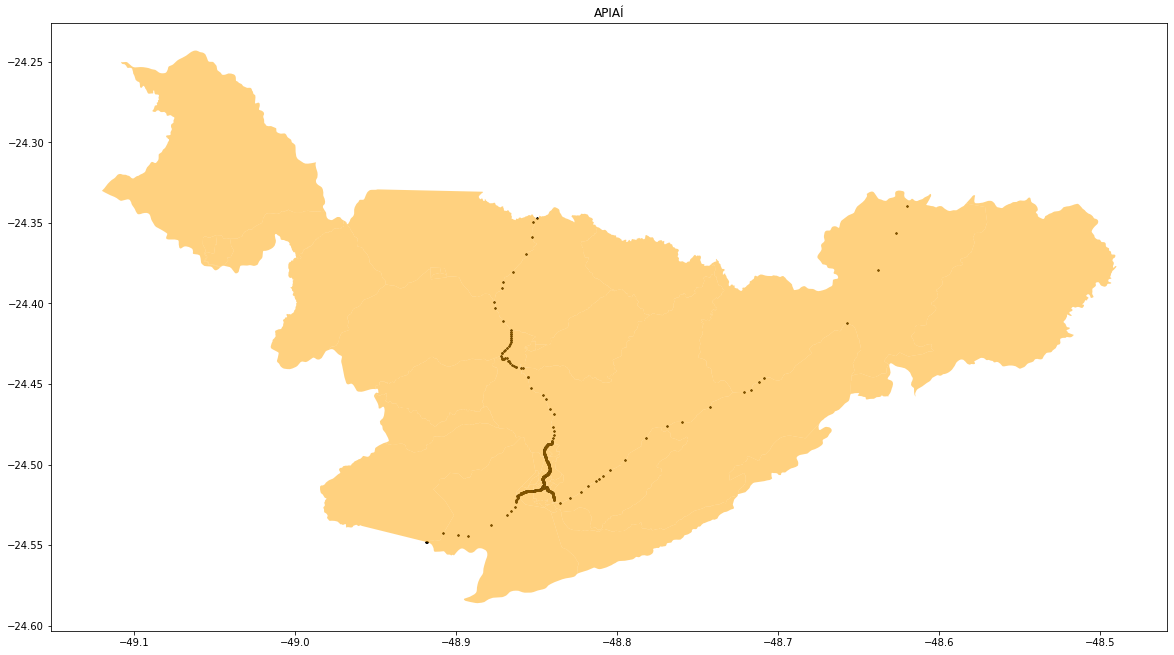

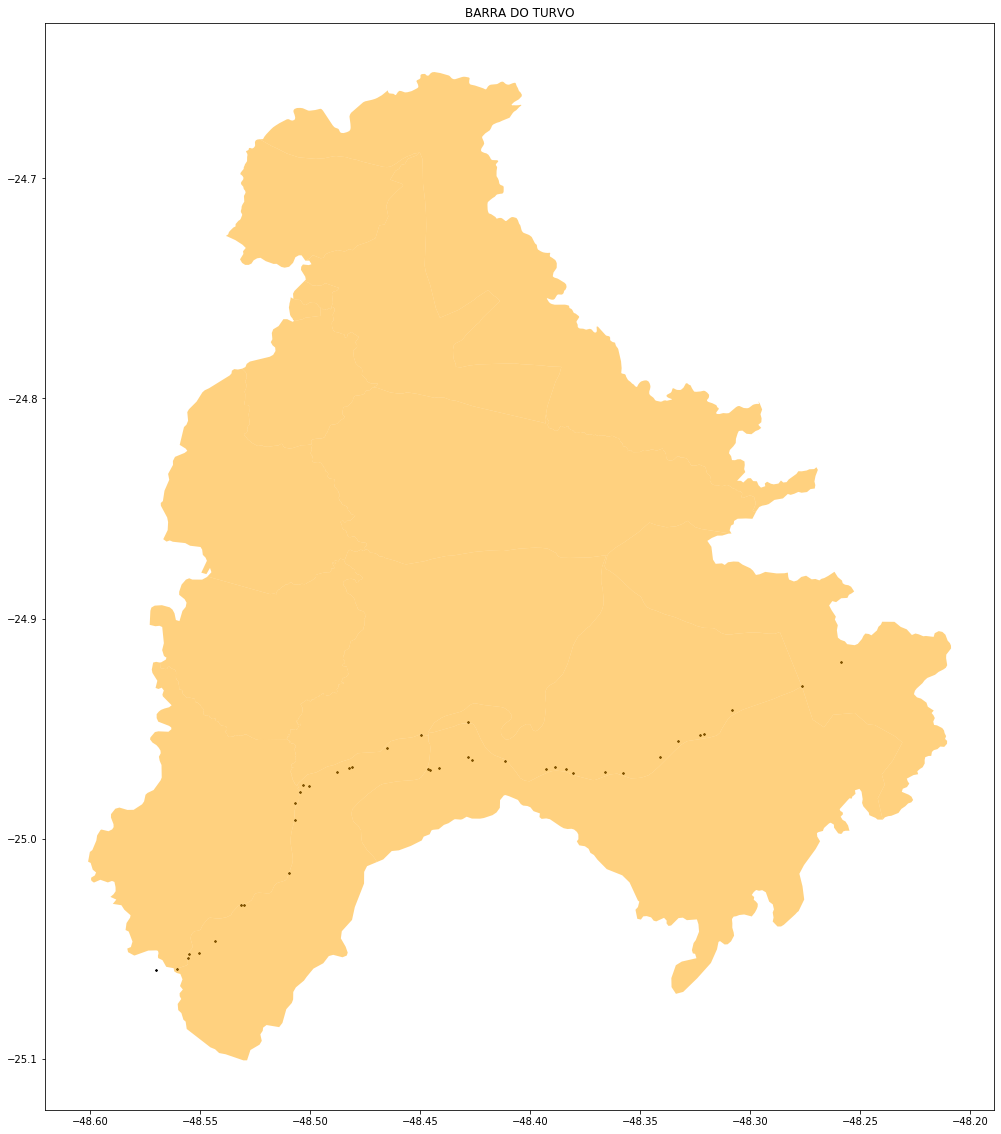

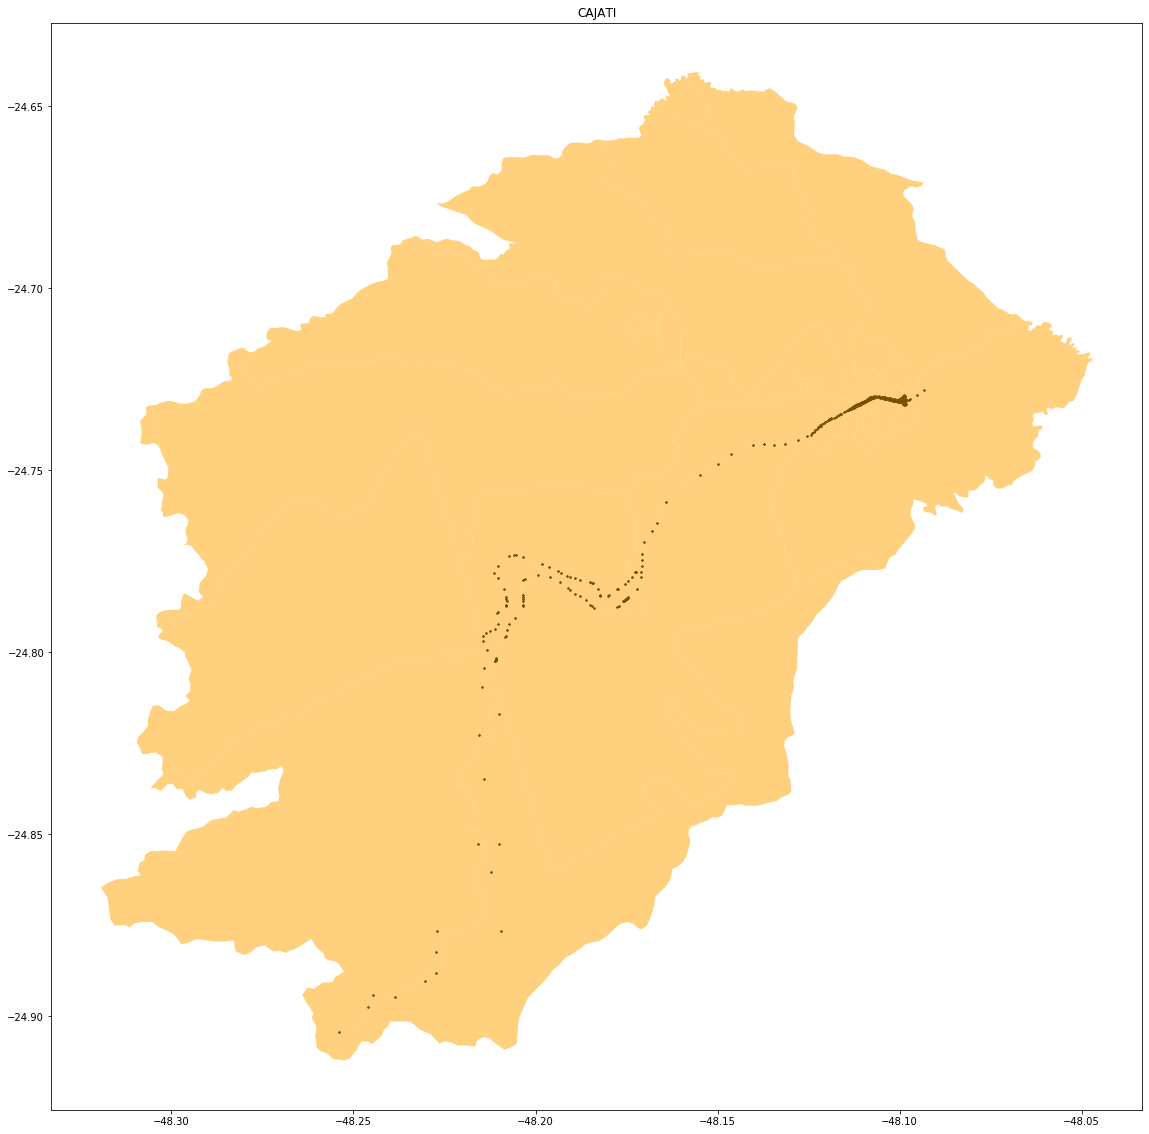

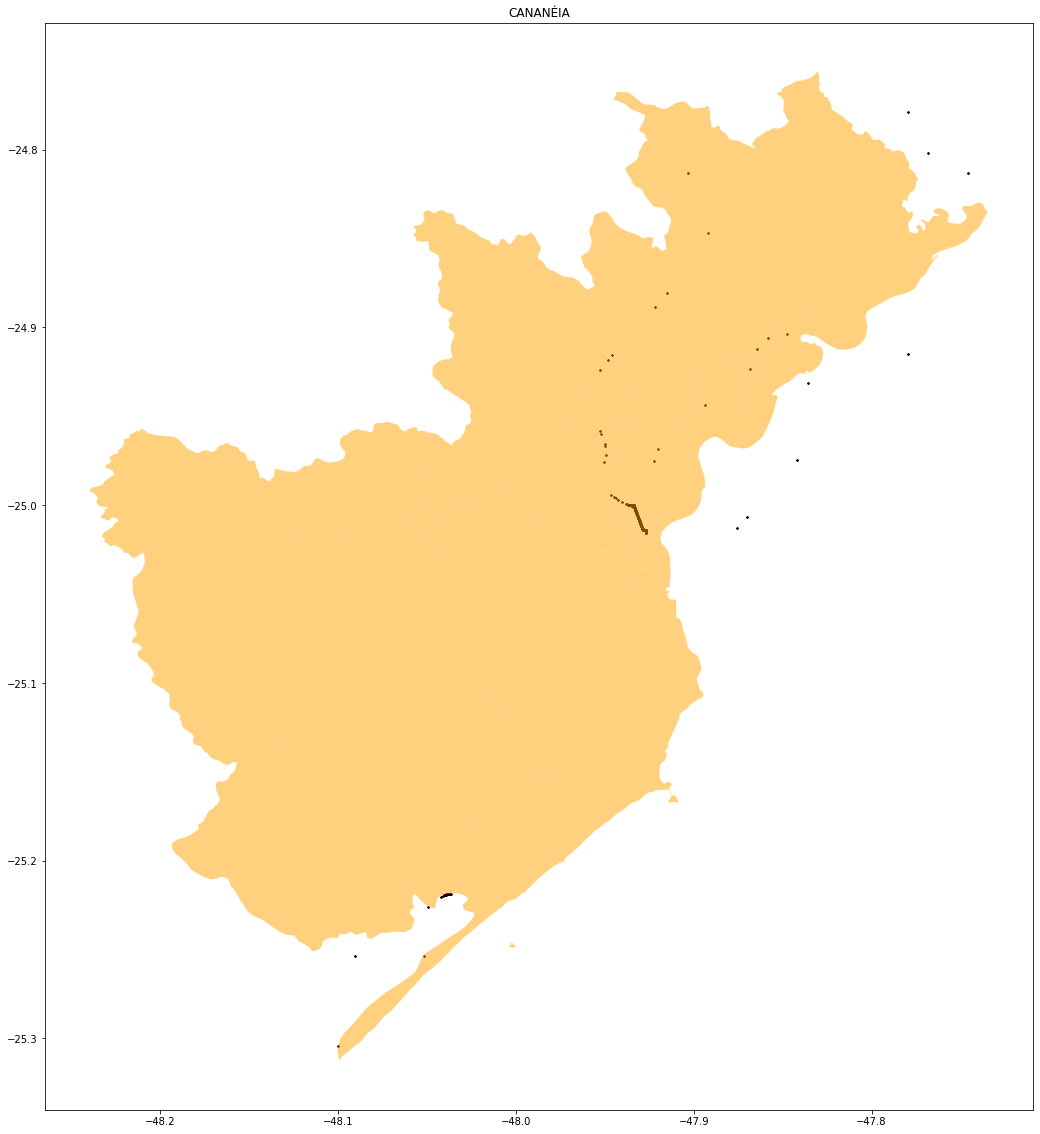

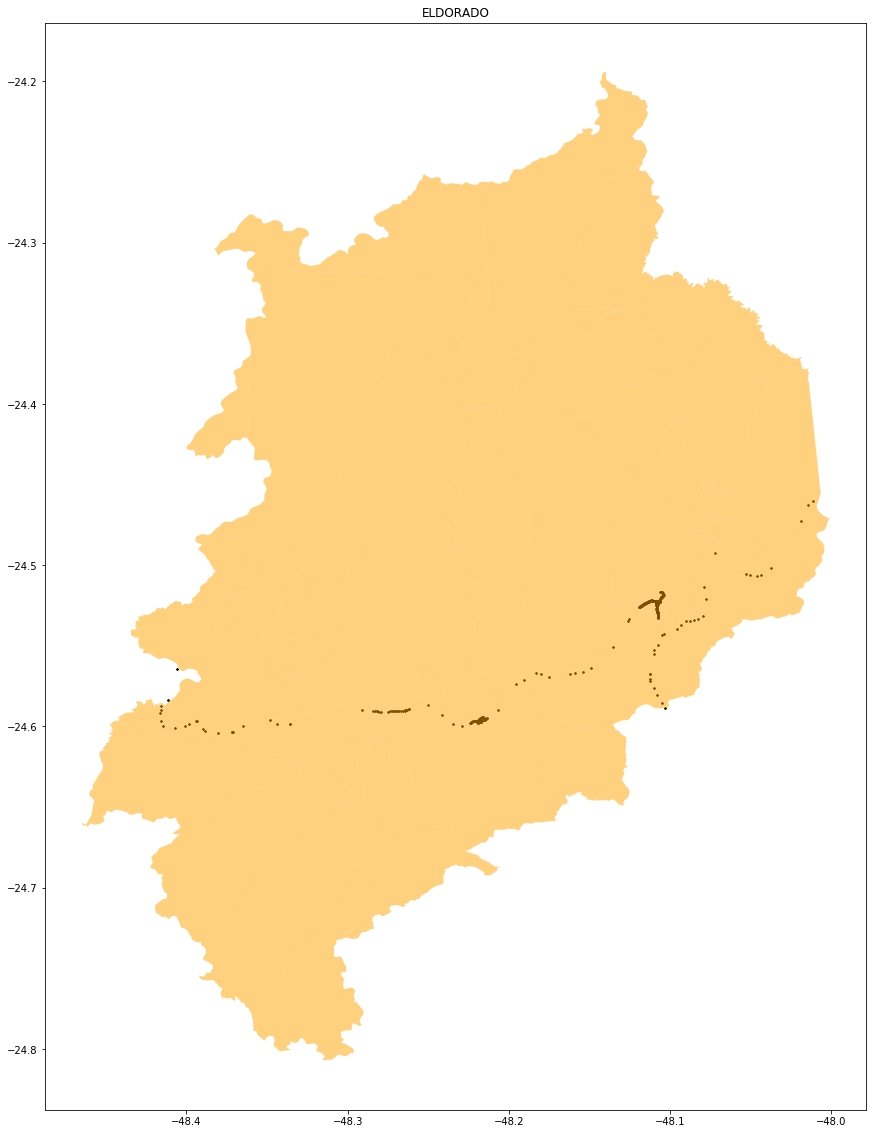

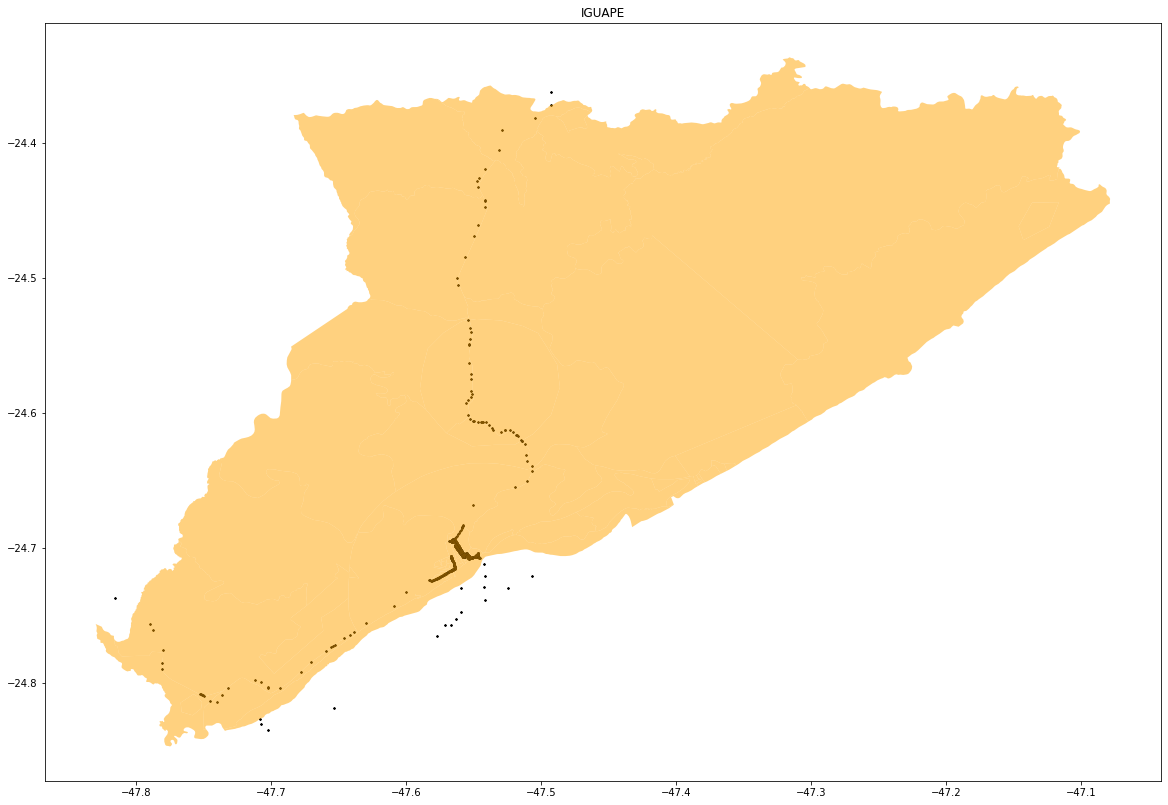

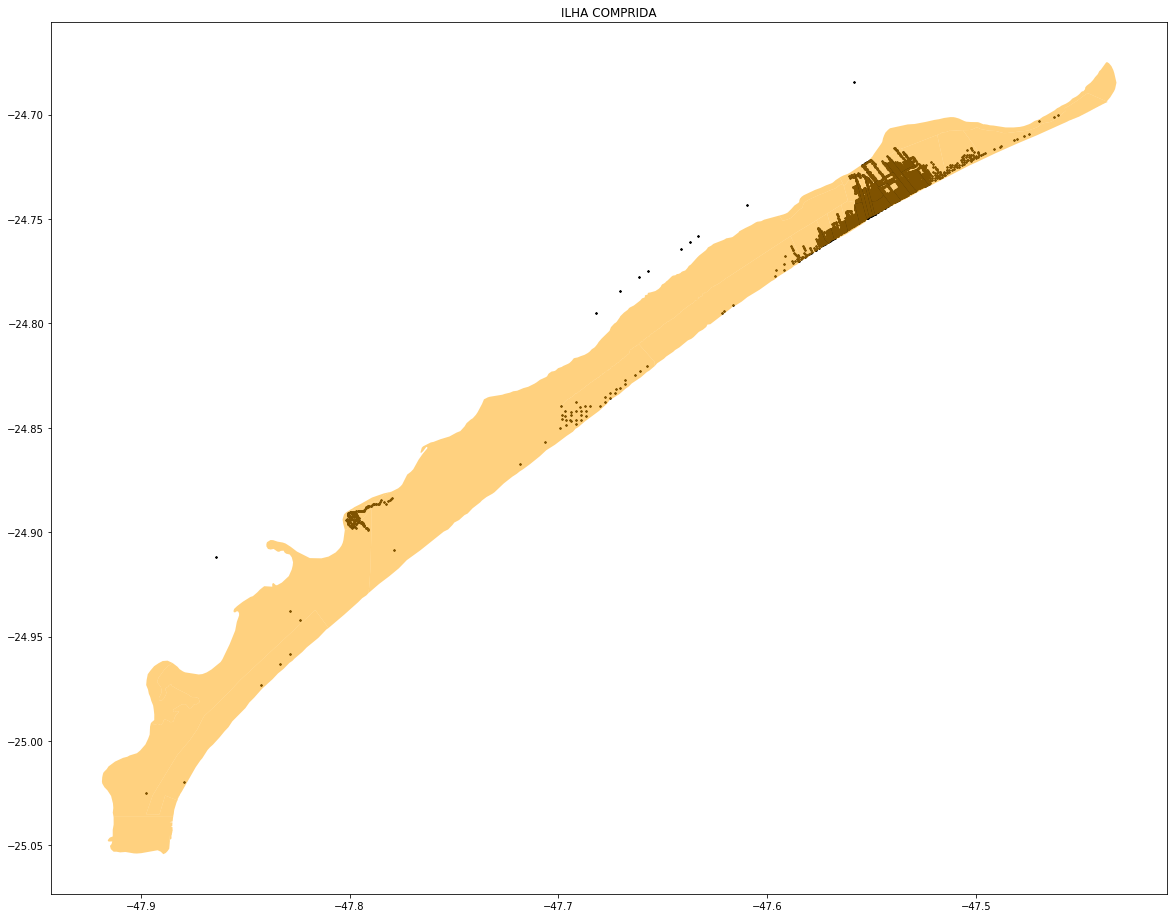

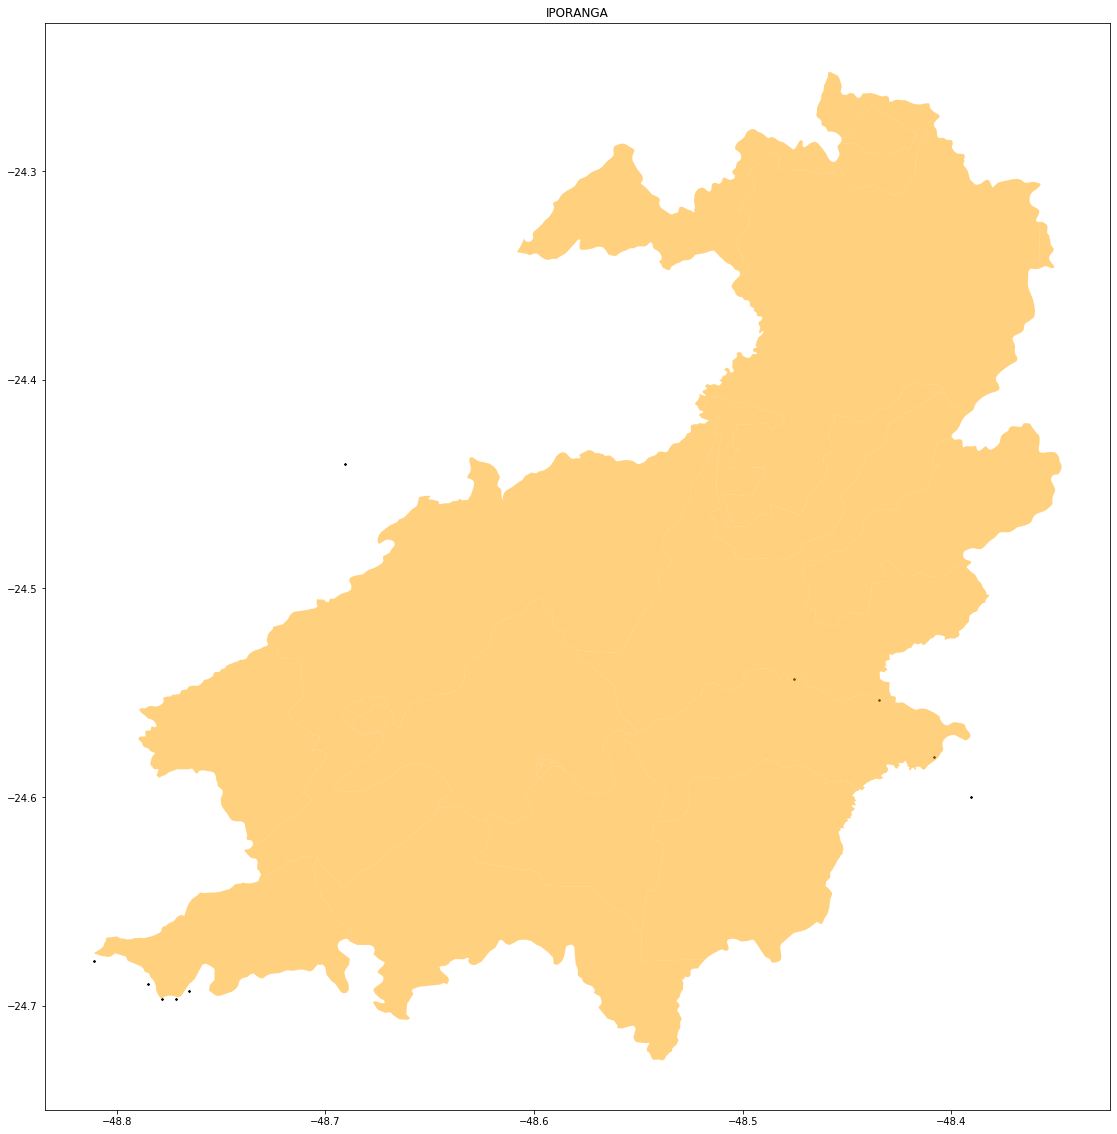

KeyError: 'ITAÓCA'

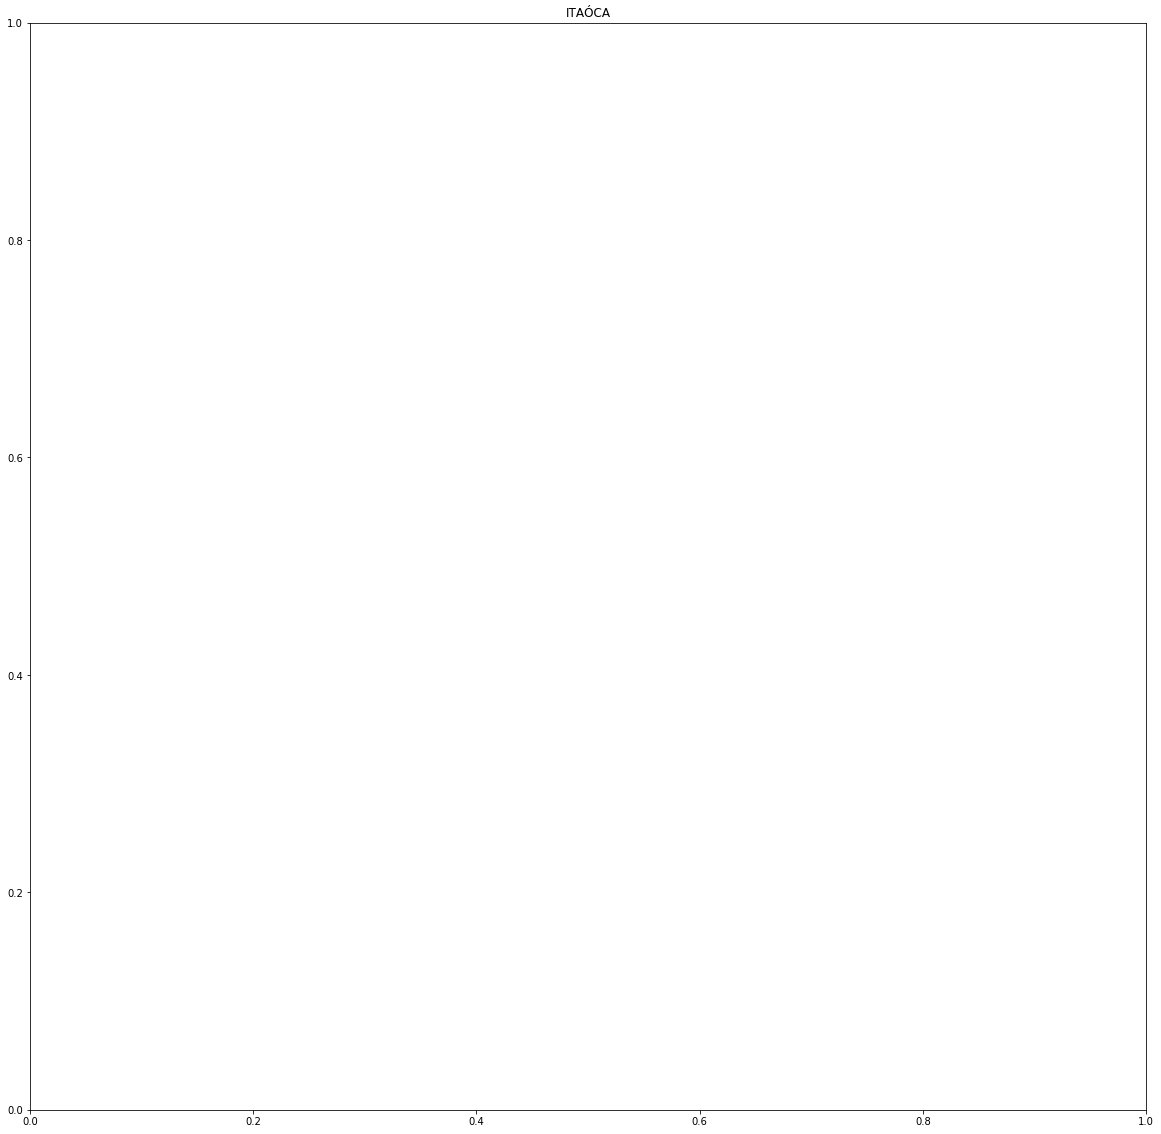

In [18]:
in_out = {}
for city in geo['city'].unique():
    fig, axs = plt.subplots(1, 1, figsize=(20,20))
    plt.title(city)
    city_dots = geo[geo['city'] == city]    
    city_area = vale[vale['CD_GEOCODM'] == str(city_codes[city])]
    count_in = city_dots['geometry'].apply(
        lambda x: any([x.within(y) for y in city_area['geometry']])).sum()
    in_out[city] = {'in': count_in, 'out': city_dots.shape[0]-count_in}
    city_dots.plot(ax=axs, markersize=1, color='k')
    city_area.plot(ax=axs, color='orange', alpha=0.5)
    x0, y0, x1, y1 = city_area.bounds
#     plt.xlim(x0, x1)
#     plt.ylim(y0, y1)
    plt.show()

In [19]:
in_out

{'APIAÍ': {'in': 2244, 'out': 8},
 'BARRA DO TURVO': {'in': 152, 'out': 4},
 'CAJATI': {'in': 1512, 'out': 0},
 'CANANÉIA': {'in': 840, 'out': 116},
 'ELDORADO': {'in': 1580, 'out': 12},
 'IGUAPE': {'in': 2964, 'out': 76},
 'ILHA COMPRIDA': {'in': 15636, 'out': 40},
 'IPORANGA': {'in': 12, 'out': 28}}

In [20]:
fotos = pd.DataFrame.from_dict(in_out, orient='index')

In [21]:
fotos

,in,out
APIAÍ,2244,8
BARRA DO TURVO,152,4
CAJATI,1512,0
CANANÉIA,840,116
ELDORADO,1580,12
IGUAPE,2964,76
ILHA COMPRIDA,15636,40
IPORANGA,12,28


In [22]:
fotos['in'].sum()

24940

In [29]:
vale['photos'] = vale['CD_GEOCODI'].map(count_setor).fillna(0)

In [30]:
vale

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,...,DECILE_LS2,PERC_LSOA3,DECILE_LS3,PERC_LSOA4,DECILE_LS4,RENDA0,RENDA1,RENDA2,geometry,photos
0,66717.0,350270505000001,URBANO,35027050500,None,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,...,2.0,0.0,8.0,0.0,10.0,1.832506,-1.175954,1.681945,"POLYGON ((-48.84713 -24.51469, -48.84753 -24.5...",0.0
1,66718.0,350270505000002,URBANO,35027050500,None,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,...,3.0,0.0,10.0,0.0,10.0,1.845521,-2.134206,-0.721357,"POLYGON ((-48.84580 -24.51313, -48.84650 -24.5...",16.0
2,66719.0,350270505000003,URBANO,35027050500,None,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,...,1.0,0.0,6.0,0.0,9.0,3.473261,-4.054620,3.781584,"POLYGON ((-48.84489 -24.51740, -48.84509 -24.5...",180.0
3,66720.0,350270505000004,URBANO,35027050500,None,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,...,1.0,0.0,5.0,0.0,6.0,1.550119,-1.459676,-0.621910,"POLYGON ((-48.85038 -24.52333, -48.85048 -24.5...",128.0
4,66721.0,350270505000005,URBANO,35027050500,None,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,...,4.0,0.0,4.0,0.0,7.0,1.332302,1.510061,1.994217,"POLYGON ((-48.84228 -24.52494, -48.84244 -24.5...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,21414.0,412863305000009,RURAL,41286330500,None,412863305,DOUTOR ULYSSES,4128633,DOUTOR ULYSSES,CERRO AZUL,...,4.0,0.0,8.0,0.0,10.0,-1.958569,4.057675,0.292695,"POLYGON ((-49.39916 -24.70718, -49.35284 -24.6...",52.0
950,21415.0,412863305000010,RURAL,41286330500,None,412863305,DOUTOR ULYSSES,4128633,DOUTOR ULYSSES,CERRO AZUL,...,3.0,25.0,7.0,0.0,10.0,-1.395877,3.018495,1.400684,"POLYGON ((-49.37073 -24.61246, -49.36844 -24.6...",24.0
951,21416.0,412863305000011,RURAL,41286330500,None,412863305,DOUTOR ULYSSES,4128633,DOUTOR ULYSSES,CERRO AZUL,...,3.0,0.0,6.0,0.0,10.0,-2.080340,0.501958,-0.187184,"POLYGON ((-49.46065 -24.62345, -49.46026 -24.6...",8.0
952,21417.0,412863305000012,RURAL,41286330500,None,412863305,DOUTOR ULYSSES,4128633,DOUTOR ULYSSES,CERRO AZUL,...,1.0,0.0,6.0,0.0,10.0,-1.967962,0.914923,-0.184844,"POLYGON ((-49.53348 -24.68126, -49.53345 -24.6...",8.0


Text(0.5, 1.0, 'Distribuição do número de fotos em cada setor censitário')

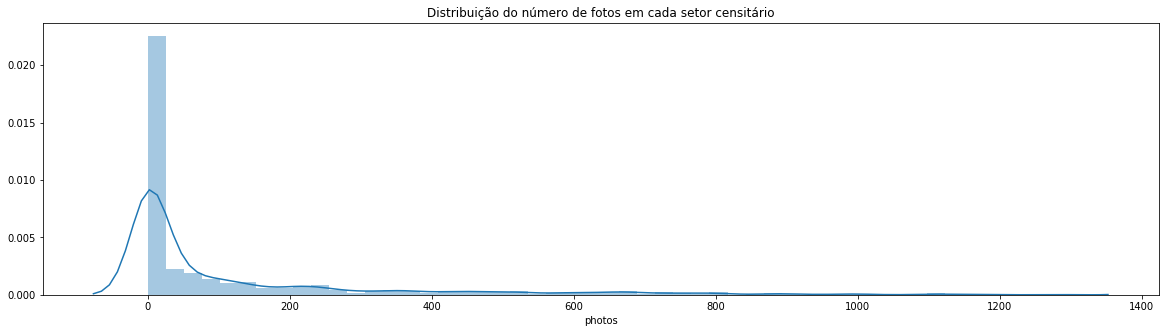

In [31]:
import seaborn as sns
plt.figure(figsize=(20, 5))
sns.distplot(vale['photos'])
plt.title("Distribuição do número de fotos em cada setor censitário")

In [32]:
uc = gpd.read_file('raw_data/shapefiles/UnidadesConservação/ucs_filtradas.shx')

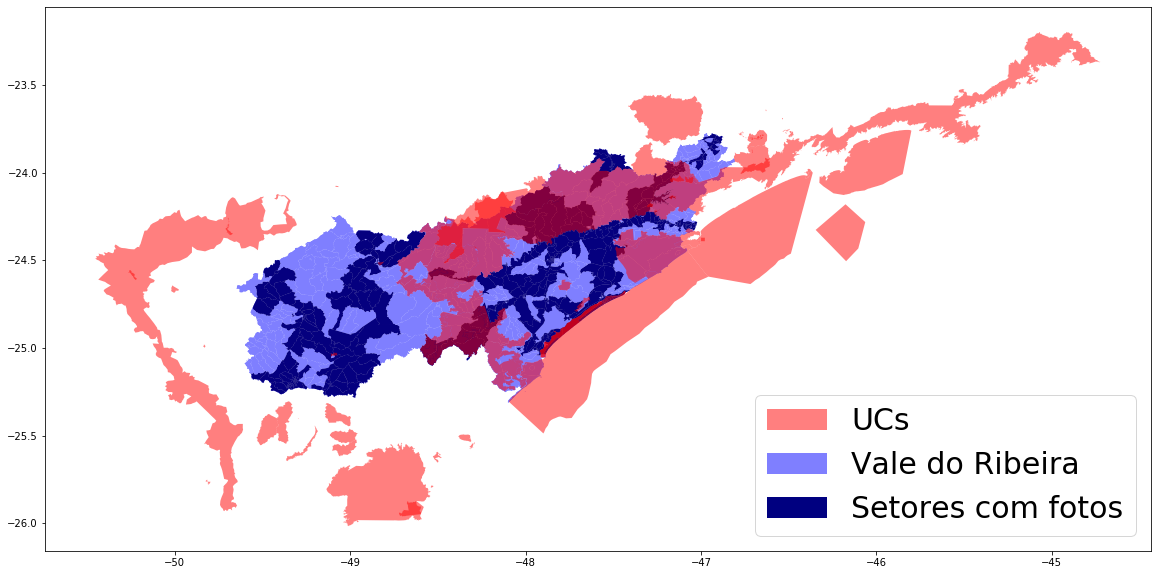

In [33]:
from matplotlib.patches import Patch

fig, axs= plt.subplots(figsize=(20, 10))

border_plot = vale.plot(ax=axs, alpha=1.0, color='#0000FF')
photos_plot = vale.plot(ax=axs, column='photos',cmap='hot_r', vmax=1, legend=False, alpha=0.5)
uc_plot = uc.plot(ax=axs, color='red', alpha=0.5)

axs.legend(handles=[Patch(facecolor='red', alpha=0.5, label='UCs'),
                    Patch(facecolor='#0000FF', alpha=0.5, label='Vale do Ribeira'),
                    Patch(facecolor='#000080', label='Setores com fotos')],
                    loc='lower right',
                    fontsize=30)
plt.show();

In [34]:
a = vale.exterior
a

0      LINEARRING (-48.84713 -24.51469, -48.84753 -24...
1      LINEARRING (-48.84580 -24.51313, -48.84650 -24...
2      LINEARRING (-48.84489 -24.51740, -48.84509 -24...
3      LINEARRING (-48.85038 -24.52333, -48.85048 -24...
4      LINEARRING (-48.84228 -24.52494, -48.84244 -24...
                             ...                        
949    LINEARRING (-49.39916 -24.70718, -49.35284 -24...
950    LINEARRING (-49.37073 -24.61246, -49.36844 -24...
951    LINEARRING (-49.46065 -24.62345, -49.46026 -24...
952    LINEARRING (-49.53348 -24.68126, -49.53345 -24...
953    LINEARRING (-49.49506 -24.57115, -49.49367 -24...
Length: 954, dtype: geometry